## Spatial Transformer Network (STM)


Dataset: https://www.cs.toronto.edu/~tijmen/affNIST/

Reference: [Implementing Spatial Transformer Network (STN) in TensorFlow by
Parth Rajesh Dedhia](https://towardsdatascience.com/implementing-spatial-transformer-network-stn-in-tensorflow-bf0dc5055cd5)


`Convolutional` layer and `Max Pooling` layer combination provides `translational invariance`. The orientation and shape of the object should not change much. This becomes a major drawback of CNN when used in a real-world setting.

The main purpose of the spatial transformation is to provide a block that converts an image to a normal image that is the same as used in classification. This can be realized using Spatial Transformer Networks. This model can be regarded as an `attention module` to any spatial input.

### Basics

In [1]:
import numpy as np

In [2]:
x = np.array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [3]:
x[2]

array([12, 13, 14, 15, 16, 17])

In [4]:
x[2,3]

15

In [5]:
x[[1,2,3]]

array([[ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [6]:
x[[3,2,3]]

array([[18, 19, 20, 21, 22, 23],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [7]:
x[[1,2,3], [3,2,3]]

array([ 9, 14, 21])

In [8]:
a = [[1,2],[3,0]] # First row, second row, third row, fourth row
b = [[0,1],[2,3]] # Zeroth col, first col, second col, third col
x[a, b]

array([[ 6, 13],
       [20,  3]])

There are many transformation operations like translation, rotation, scaling, shear, and a combination of all of the above-affine transformation.

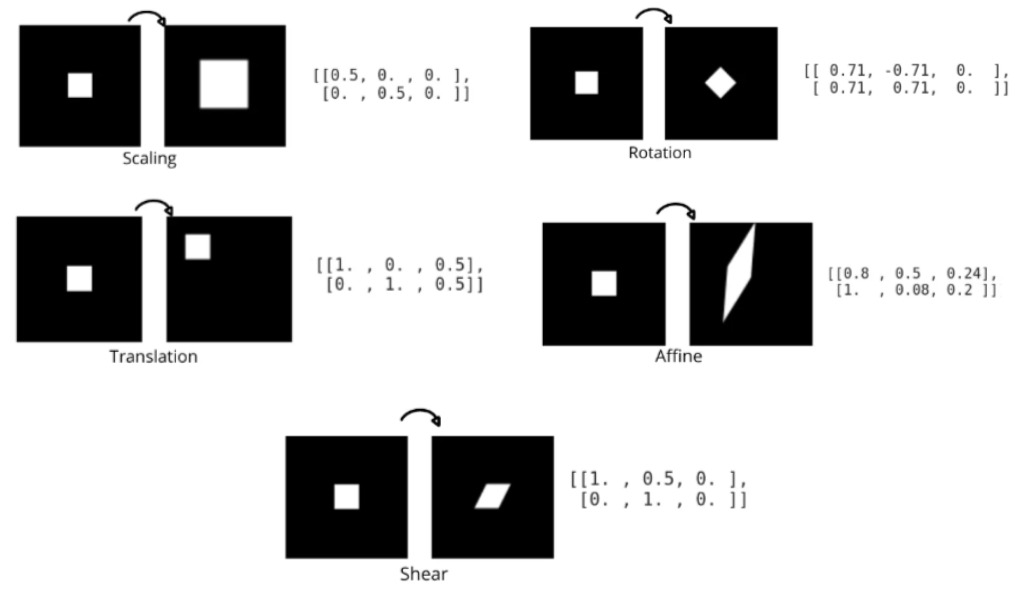

Img. ref: https://towardsdatascience.com/implementing-spatial-transformer-network-stn-in-tensorflow-bf0dc5055cd5

Note: Transformation happens at the `pixel level`. We map each pixel in the output image to a pixel of the input image and copy the pixel values.

We want to find out which pixel from the input image shall be mapped to the output image at `[w, w]`. We create an array `x = np.asarray([w, w, 1])` . Note, that an extra dimension is added to the input image. Transformation matrix `theta = np.asarray([[0.5, 0, 0], [0, 0.5, 0]])`. Now apply matmul operation: `theta @ x` and get the value as `array([w/2., w/2.])`. This means that the pixel value at `[w/2, w/2]` in the input image will be copied to `[w, w]` in the output image.

Note: The extra dimension is added to convert the coordinates from `Cartesian` to `Homogeneous` coordinates.

Bilinear Interpolation



In [9]:
height = 400
width = 400

x = np.linspace(-1, 1, width)
y = np.linspace(-1, 1, height)
# x and y are selected in the range of -1 to 1 so the transformation happens
# considering the center of the image as the origin. The images will be later
# scaled up.

transformation_matrix = np.asarray([[np.cos(np.pi/4), -np.sin(np.pi/4), 0], [np.sin(np.pi/4), np.cos(np.pi/4),0]])
# 45 degree rotation matrix

xx, yy = np.meshgrid(x, y)
xx

array([[-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
         0.99498747,  1.        ],
       [-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
         0.99498747,  1.        ],
       [-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
         0.99498747,  1.        ],
       ...,
       [-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
         0.99498747,  1.        ],
       [-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
         0.99498747,  1.        ],
       [-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
         0.99498747,  1.        ]])

In [10]:
yy

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.99498747, -0.99498747, -0.99498747, ..., -0.99498747,
        -0.99498747, -0.99498747],
       [-0.98997494, -0.98997494, -0.98997494, ..., -0.98997494,
        -0.98997494, -0.98997494],
       ...,
       [ 0.98997494,  0.98997494,  0.98997494, ...,  0.98997494,
         0.98997494,  0.98997494],
       [ 0.99498747,  0.99498747,  0.99498747, ...,  0.99498747,
         0.99498747,  0.99498747],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [11]:
height = 400
width = 400

x = np.linspace(-1, 1, width)
y = np.linspace(-1, 1, height)
# x and y are selected in the range of -1 to 1 so the transformation happens
# considering the center of the image as the origin. The images will be later
# scaled up.

transformation_matrix = np.asarray([[np.cos(np.pi/4), -np.sin(np.pi/4), 0], [np.sin(np.pi/4), np.cos(np.pi/4), 0]])
# 45 degree rotation matrix

xx, yy = np.meshgrid(x, y)  # Return a list of coordinate matrices from coordinate vectors
homogeneous_co_ordinates = np.vstack([xx.flatten(), yy.flatten(), np.ones_like(xx.flatten())])
# homogeneous_co_ordinates.shape: (3, 160000)

transformed_co_ordinates = transformation_matrix @ homogeneous_co_ordinates
# Operation: Transformation matrix (2, 3) @ homogeneous_co_ordinates (3, 160000)
# transformed_co_ordinates.shape : (2, 16000)

transformed_co_ordinates = transformed_co_ordinates.reshape(2, height, width)
# transformed_co_ordinates.shape : (2, 400, 400)

transformed_co_ordinates = np.moveaxis(transformed_co_ordinates, 0, -1)
# transformed_co_ordinates.shape : (400, 400, 2)

x_transformed = transformed_co_ordinates[:,:,0:1].squeeze()
y_transformed = transformed_co_ordinates[:,:,1:2].squeeze()
# extracting x and the y co-ordinates separately

x = ((x_transformed + 1.) * width) * 0.5 # x.shape: (400, 400)
y = ((y_transformed + 1.) * height) * 0.5 # y.shape: (400, 400)
# Scaling the co-ordinates to the image size.

The `homogeneous_co_ordinates` is the set of all the `output image pixel indices` converted to `homogeneous format` (ones are added to the vector). Then separate the x and y `transformed_co_ordinates` and `scale` them to the size of `image height` and `width`. Once again, this x and y obtained after transformation correspond to the input image pixel index which will be mapped to the output image. However, these `x` and `y` are `floating points` and `cannot` directly be `mapped to a pixel intensity` and `interpolation` will be applied.

In [12]:
x0 = np.floor(x).astype(np.int64) # The floor of the scalar x is the largest integer (element-wise)
x1 = x0 + 1
# rounding the x co-ordinate to the closest integer pixel location
y0 = np.floor(y).astype(np.int64)
y1 = y0 + 1
# rounding the y co-ordinate to the closest integer pixel location

In [13]:
x0 = np.clip(x0, 0, width-1)
x1 = np.clip(x1, 0, width-1)

y0 = np.clip(y0, 0, height-1)
y1 = np.clip(y1, 0, height-1)

x = np.clip(x, 0, width-1)
y = np.clip(y, 0, height-1)
# clipping the values so that they do not exceed the maximum height and width.
# Also converting negative numbers to zero.

The `x`, `y` represent the `transformed coordinates` (floating-point numbers). The `x0` and `y0` represent the `pixel index closest` to but `less than x` and `y` and `x1` and `y1` represent the `pixel index closest` to but `greater than x` and `y`. The valid combinations formed by x0, x1, y0, and y1 represent the four closest integer pixel locations around x and y. The pixel intensities at these values can be equated to Qₓᵧ.

The img contains the desired image that is to be transformed, and it should be of size [height, width]. Our objective is to find the pixel value at P, and the naive approach to solve is for each of the x and y pair, we find the corresponding 4-pixel intensities and apply the weighted average formula discussed in the previous section. However, this approach is an in-efficient one.

In [14]:
#Ia = img[y0, x0]
#Ib = img[y1, x0]
#Ic = img[y0, x1]
#Id = img[y1, x1]

### Basics END

### STN

In [15]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.io.matlab import loadmat
import tensorflow as tf
import numpy as np
import datetime
import os

%load_ext tensorboard

In [16]:
tf.random.set_seed(9)

In [17]:
!wget -c https://www.cs.toronto.edu/~tijmen/affNIST/32x/transformed/training_and_validation_batches.zip

--2023-11-30 07:32:55--  https://www.cs.toronto.edu/~tijmen/affNIST/32x/transformed/training_and_validation_batches.zip
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730609891 (697M) [application/zip]
Saving to: ‘training_and_validation_batches.zip’

training_and_valida 100%[===================>] 696.76M  14.3MB/s    in 53s     

2023-11-30 07:33:49 (13.2 MB/s) - ‘training_and_validation_batches.zip’ saved [730609891/730609891]



In [18]:
! unzip training_and_validation_batches.zip
! rm /content/training_and_validation_batches.zip

Archive:  training_and_validation_batches.zip
   creating: training_and_validation_batches/
  inflating: training_and_validation_batches/1.mat  
  inflating: training_and_validation_batches/2.mat  
  inflating: training_and_validation_batches/3.mat  
  inflating: training_and_validation_batches/4.mat  
  inflating: training_and_validation_batches/5.mat  
  inflating: training_and_validation_batches/6.mat  
  inflating: training_and_validation_batches/7.mat  
  inflating: training_and_validation_batches/8.mat  
  inflating: training_and_validation_batches/9.mat  
  inflating: training_and_validation_batches/10.mat  
  inflating: training_and_validation_batches/11.mat  
  inflating: training_and_validation_batches/12.mat  
  inflating: training_and_validation_batches/13.mat  
  inflating: training_and_validation_batches/14.mat  
  inflating: training_and_validation_batches/15.mat  
  inflating: training_and_validation_batches/16.mat  
  inflating: training_and_validation_batches/17.mat  

In [19]:
batch_size = 256
epochs = 100

In [20]:
image_path = '/content/training_and_validation_batches/1.mat'
temp = loadmat(image_path)

x = temp['affNISTdata']['image'][0][0].reshape(40, 40, 60000)
x = np.moveaxis(x, -1, 0)
x = np.expand_dims(x, axis=-1)
x = x/255.0

y = temp['affNISTdata']['label_int'][0][0]
y = np.moveaxis(y, -1, 0)
y = y.astype(np.int32)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [22]:
mnist_train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
mnist_train_ds = mnist_train_ds.shuffle(5000).batch(batch_size)

In [23]:
class Localization(tf.keras.layers.Layer):
    def __init__(self):
        super(Localization, self).__init__()
        self.pool1 = tf.keras.layers.MaxPool2D()
        self.conv1 = tf.keras.layers.Conv2D(20, [5, 5], activation='relu')
        self.pool2 = tf.keras.layers.MaxPool2D()
        self.conv2 = tf.keras.layers.Conv2D(20, [5, 5], activation='relu')
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(20, activation='relu')
        self.fc2 = tf.keras.layers.Dense(6, activation=None, bias_initializer=tf.keras.initializers.constant([1.0, 0.0, 0.0, 0.0, 1.0, 0.0]), kernel_initializer='zeros')

    def build(self, input_shape):
        print("Building Localization Network with input shape:", input_shape)

    def compute_output_shape(self, input_shape):
        return [None, 6]

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        theta = self.fc2(x)
        theta = tf.keras.layers.Reshape((2, 3))(theta)
        return theta

In [24]:
class BilinearInterpolation(tf.keras.layers.Layer):
    def __init__(self, height=40, width=40):
        super(BilinearInterpolation, self).__init__()
        self.height = height
        self.width = width

    def compute_output_shape(self, input_shape):
        return [None, self.height, self.width, 1]

    def get_config(self):
        return {
            'height': self.height,
            'width': self.width,
        }

    def build(self, input_shape):
        print("Building Bilinear Interpolation Layer with input shape:", input_shape)

    def advance_indexing(self, inputs, x, y):
        '''
        Numpy like advance indexing is not supported in tensorflow, hence, this function is a hack around the same method
        '''
        shape = tf.shape(inputs)
        batch_size, _, _ = shape[0], shape[1], shape[2]

        batch_idx = tf.range(0, batch_size)
        batch_idx = tf.reshape(batch_idx, (batch_size, 1, 1))
        b = tf.tile(batch_idx, (1, self.height, self.width))
        indices = tf.stack([b, y, x], 3)
        return tf.gather_nd(inputs, indices)

    def call(self, inputs):
        images, theta = inputs
        homogenous_coordinates = self.grid_generator(batch=tf.shape(images)[0])
        return self.interpolate(images, homogenous_coordinates, theta)

    def grid_generator(self, batch):
        x = tf.linspace(-1, 1, self.width)
        y = tf.linspace(-1, 1, self.height)

        xx, yy = tf.meshgrid(x, y)
        xx = tf.reshape(xx, (-1,))
        yy = tf.reshape(yy, (-1,))
        homogenous_coordinates = tf.stack([xx, yy, tf.ones_like(xx)])
        homogenous_coordinates = tf.expand_dims(homogenous_coordinates, axis=0)
        homogenous_coordinates = tf.tile(homogenous_coordinates, [batch, 1, 1])
        homogenous_coordinates = tf.cast(homogenous_coordinates, dtype=tf.float32)
        return homogenous_coordinates

    def interpolate(self, images, homogenous_coordinates, theta):
        with tf.name_scope("Transformation"):
            transformed = tf.matmul(theta, homogenous_coordinates)
            transformed = tf.transpose(transformed, perm=[0, 2, 1])
            transformed = tf.reshape(transformed, [-1, self.height, self.width, 2])

            x_transformed = transformed[:, :, :, 0]
            y_transformed = transformed[:, :, :, 1]

            x = ((x_transformed + 1.) * tf.cast(self.width, dtype=tf.float32)) * 0.5
            y = ((y_transformed + 1.) * tf.cast(self.height, dtype=tf.float32)) * 0.5

        with tf.name_scope("VariableCasting"):
            x0 = tf.cast(tf.math.floor(x), dtype=tf.int32)
            x1 = x0 + 1
            y0 = tf.cast(tf.math.floor(y), dtype=tf.int32)
            y1 = y0 + 1

            x0 = tf.clip_by_value(x0, 0, self.width-1)
            x1 = tf.clip_by_value(x1, 0, self.width-1)
            y0 = tf.clip_by_value(y0, 0, self.height-1)
            y1 = tf.clip_by_value(y1, 0, self.height-1)

            x = tf.clip_by_value(x, 0, tf.cast(self.width, dtype=tf.float32)-1.0)
            y = tf.clip_by_value(y, 0, tf.cast(self.height, dtype=tf.float32)-1)

        with tf.name_scope("AdvanceIndexing"):
            Ia = self.advance_indexing(images, x0, y0)
            Ib = self.advance_indexing(images, x0, y1)
            Ic = self.advance_indexing(images, x1, y0)
            Id = self.advance_indexing(images, x1, y1)

        with tf.name_scope("Interpolation"):
            x0 = tf.cast(x0, dtype=tf.float32)
            x1 = tf.cast(x1, dtype=tf.float32)
            y0 = tf.cast(y0, dtype=tf.float32)
            y1 = tf.cast(y1, dtype=tf.float32)

            wa = (x1-x) * (y1-y)
            wb = (x1-x) * (y-y0)
            wc = (x-x0) * (y1-y)
            wd = (x-x0) * (y-y0)

            wa = tf.expand_dims(wa, axis=3)
            wb = tf.expand_dims(wb, axis=3)
            wc = tf.expand_dims(wc, axis=3)
            wd = tf.expand_dims(wd, axis=3)

        return tf.math.add_n([wa*Ia + wb*Ib + wc*Ic + wd*Id])

In [25]:
bilinear_interpolation = BilinearInterpolation()

In [26]:
image = np.zeros((2, 40, 40, 1))

image[0, 10:20, 10:20, :] = 1
image[1, 20:30, 20:30, :] = 1

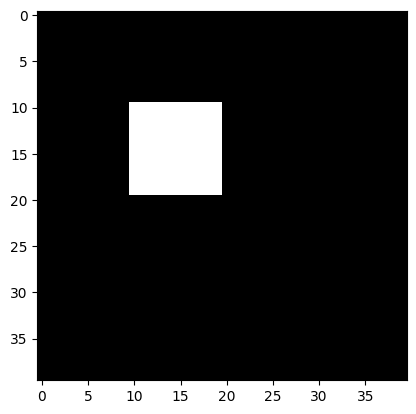

In [27]:
plt.imshow(image[0,:,:,0], cmap='gray')

In [28]:
# 45 degree rotation matrix
theta = np.asarray([[np.cos(np.pi/4), -np.sin(np.pi/4), 0], [np.sin(np.pi/4), np.cos(np.pi/4),0]])

In [29]:
result = bilinear_interpolation([image, theta])

Building Bilinear Interpolation Layer with input shape: [TensorShape([2, 40, 40, 1]), TensorShape([2, 3])]


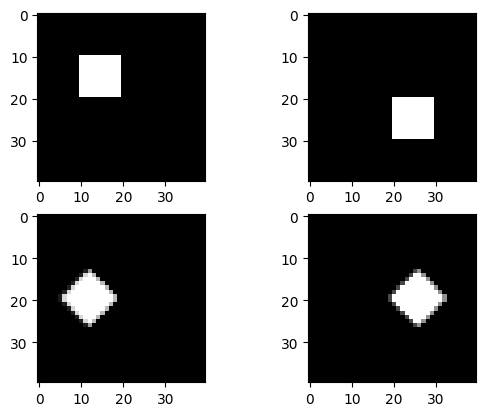

In [30]:
plt.subplot(2, 2, 1)
plt.imshow(image[0, :, :, 0], cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(image[1, :, :, 0], cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(result[0, :, :, 0], cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(result[1, :, :, 0], cmap='gray')

### Build Spatial Transformer Network

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*-KauPUQajORJtCb-9J71tA.png)

In [31]:
def create_spatial_transformer_network(input_shape):
    image = tf.keras.layers.Input(shape=input_shape)
    theta = Localization()(image)
    x = BilinearInterpolation(height=input_shape[0], width=input_shape[1])([image, theta])
    x = tf.keras.layers.Conv2D(64, [9, 9], activation='relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Conv2D(64, [7, 7], activation='relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)

    return tf.keras.models.Model(inputs=image, outputs=x)

In [32]:
spatial_transformer_model = create_spatial_transformer_network((40, 40, 1))

Building Localization Network with input shape: (None, 40, 40, 1)
Building Bilinear Interpolation Layer with input shape: [TensorShape([None, 40, 40, 1]), TensorShape([None, 2, 3])]


In [33]:
spatial_transformer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 40, 40, 1)]          0         []                            
                                                                                                  
 localization (Localization  (None, 2, 3)                 30286     ['input_1[0][0]']             
 )                                                                                                
                                                                                                  
 bilinear_interpolation_1 (  (None, 40, 40, 1)            0         ['input_1[0][0]',             
 BilinearInterpolation)                                              'localization[0][0]']        
                                                                                              

In [34]:
spatial_transformer_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
def schedular(epoch, lr):
    if epoch % 20 == 0 and epoch > 0:
        print("Learning rate update...")
    return lr

In [36]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(schedular)

In [37]:
spatial_transformer_model_hist = spatial_transformer_model.fit(mnist_train_ds, epochs=epochs, callbacks=[tensorboard_callback, learning_rate_callback])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


211/211 [==============================] - 27s 70ms/step - loss: 0.7204 - accuracy: 0.7582 - lr: 0.0010
Epoch 2/100
211/211 [==============================] - 12s 55ms/step - loss: 0.1546 - accuracy: 0.9535 - lr: 0.0010
Epoch 3/100
211/211 [==============================] - 12s 56ms/step - loss: 0.0984 - accuracy: 0.9699 - lr: 0.0010
Epoch 4/100
211/211 [==============================] - 13s 60ms/step - loss: 0.0799 - accuracy: 0.9754 - lr: 0.0010
Epoch 5/100
211/211 [==============================] - 12s 56ms/step - loss: 0.0646 - accuracy: 0.9804 - lr: 0.0010
Epoch 6/100
211/211 [==============================] - 12s 56ms/step - loss: 0.0556 - accuracy: 0.9829 - lr: 0.0010
Epoch 7/100
211/211 [==============================] - 12s 56ms/step - loss: 0.0495 - accuracy: 0.9848 - lr: 0.0010
Epoch 8/100
211/211 [==============================] - 13s 61ms/step - loss: 0.0443 - accuracy: 0.9863 - lr: 0.0010
Epoch 9/100
211/211 [==============================] - 13s 59ms/step - loss: 0.0361 

In [38]:
spatial_transformer_model.save_weights('./model/weights', save_format='tf')

In [39]:
stn = tf.keras.models.Model(inputs=spatial_transformer_model.inputs, outputs=[spatial_transformer_model.layers[1].output, spatial_transformer_model.layers[2].output])

In [40]:
theta, prediction = stn.predict(X_test)

188/188 [==============================] - 2s 6ms/step


1/1 [==============================] - 0s 33ms/step

 [[ 0.9134845   0.33233127 -0.21900353]
 [-0.30973276  0.90501493  0.20711802]]


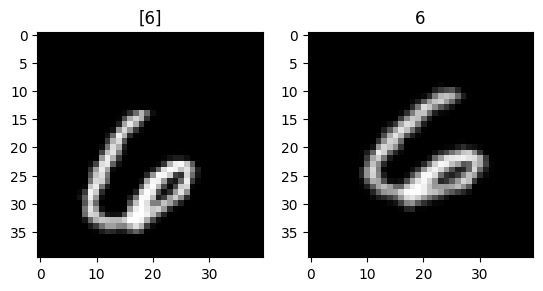

In [44]:
index = 210

plt.subplot(1,2,1)
plt.title(y_test[index])
plt.imshow(X_test[index, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title(np.argmax(spatial_transformer_model.predict(np.expand_dims(X_test[index, :, :, 0], axis=0))))
plt.imshow(prediction[index, :, :, 0], cmap='gray')

print("\n", theta[index])

### Reference

https://towardsdatascience.com/implementing-spatial-transformer-network-stn-in-tensorflow-bf0dc5055cd5

https://github.com/dedhiaparth98/spatial-transformer-network?source=post_page-----bf0dc5055cd5--------------------------------

https://kevinzakka.github.io/2017/01/10/stn-part1/

https://kevinzakka.github.io/2017/01/18/stn-part2/

M. Jaderberg, K. Simonyan, A. Zisserman, K. Kavukcuoglu, Spatial Transformer Networks, CVPR, 2015
